In [48]:
#Gonna have to do attribute analysis first, then I can do statistical analysis later. 
#loading the data into the spreadsheet
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
dm_file_path = '/Users/JumpMan/Desktop/FM_Analytics_Project_Feb_2024/FM24_Player_Database/Arsenal_FM24_Save/Attributes/csv/Defensive_Midfielder_2023_24..xlsx'
dm_df = pd.read_excel(dm_file_path)
dm_df.head(20)

,UID,Name,Club,Position,Age,Transfer Value,Salary,Determination,Workrate,Positioning,...,Teamwork,Bravery,Decisions,Balance,Composure,Natural Fitness,Technique,Passing,Flair,First Touch
0,49056243,Eduardo Camavinga - French,R. Madrid - Spanish First Division,"D (L), DM, M (C)",21,"£ 211,000,000.00",250000,15,18,16,...,16,15,15,15,15,16,16,16,12,15
1,78084541,Manuel Ugarte - Uruguayan,Paris SG - Ligue 1 Uber Eats,"DM, M (C)",23,"£ 207,000,000.00",78000,19,17,16,...,18,18,13,16,13,18,12,13,12,12
2,43298481,Sandro Tonali - Italian,Newcastle - English Premier Division,"DM, M (C)",24,"£ 174,000,000.00",135000,16,16,14,...,17,16,14,15,15,14,15,14,12,15
3,86078360,Moisés Caicedo - Ecuadorian,Chelsea - English Premier Division,"DM, M (C)",22,"£ 174,500,000.00",140000,14,16,16,...,15,15,16,12,15,18,15,15,14,14
4,19297055,Bruno Guimarães - Brazilian,Newcastle - English Premier Division,"DM, M (C)",26,"£ 154,000,000.00",180000,14,16,16,...,15,15,15,14,18,14,18,18,14,18
5,91104807,Leon Goretzka - German,FC Bayern - Bundesliga,"DM, M/AM (C)",29,"£ 134,000,000.00",230000,18,17,13,...,16,16,14,15,14,12,15,15,12,15
6,55070285,João Palhinha - Portuguese,Fulham - English Premier Division,"DM, M (C)",28,"£ 105,500,000.00",100000,15,15,17,...,15,17,15,14,15,15,14,14,6,13
7,48030711,André-Franck Zambo Anguissa - Cameroonian,Parthenope - Italian Serie A,"DM, M (C)",28,"£ 103,500,000.00",99000,17,15,14,...,15,14,14,18,15,15,16,16,16,16
8,43167354,Manuel Locatelli - Italian,Juventus - Italian Serie A,"DM, M (C)",26,"£ 104,000,000.00",92000,17,16,15,...,17,15,13,14,13,14,14,15,14,15
9,67211760,Mikel Merino - Spanish,Real San Sebastián - Spanish First Division,"DM, M (C)",27,"£ 76,000,000.00",67000,16,15,14,...,15,15,14,13,13,16,15,16,13,14


In [50]:
print(dm_df.columns)

Index(['UID', 'Name', 'Club', 'Position', 'Age', 'Transfer Value ', 'Salary',
       'Determination', 'Workrate', 'Positioning', 'Anticipation', 'Tackling',
       'Strength', 'Stamina', 'Aggression', 'Marking', 'Control', 'Vision',
       'Off The Ball', 'Teamwork', 'Bravery', 'Decisions', 'Balance',
       'Composure', 'Natural Fitness', 'Technique', 'Passing', 'Flair',
       'First Touch'],
      dtype='object')


In [51]:
#Calculator
#Calculator Stuff
dm_df['dm_key']= ((
    dm_df['Tackling'] + 
    dm_df['Anticipation'] + 
    dm_df['Technique'] + 
    dm_df['Teamwork'] + 
    dm_df['Decisions'] + 
    dm_df['Marking'] + 
    dm_df['Vision'] + 
    dm_df['Passing'] +
    dm_df['First Touch'] 
) * 5)



dm_df['dm_important'] = ((
    dm_df['Aggression'] + 
    dm_df['Control'] + 
    dm_df['Balance'] + 
    dm_df['Positioning'] + 
    dm_df['Strength'] +
    dm_df['Off The Ball'] +
    dm_df['Composure'] +
    dm_df['Determination'] 
) * 4)


dm_df['dm_other'] = ((
    dm_df['Workrate'] + 
    dm_df['Stamina'] + 
    dm_df['Bravery'] + 
    dm_df['Natural Fitness'] + 
    dm_df['Flair']  
) * 3)



dm_df['dm_score'] = ((dm_df['dm_key'] + dm_df['dm_important'] + dm_df['dm_other']) / 92)
dm_df['dm_score'] = dm_df['dm_score'].round(1)


/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_59203/150363132.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


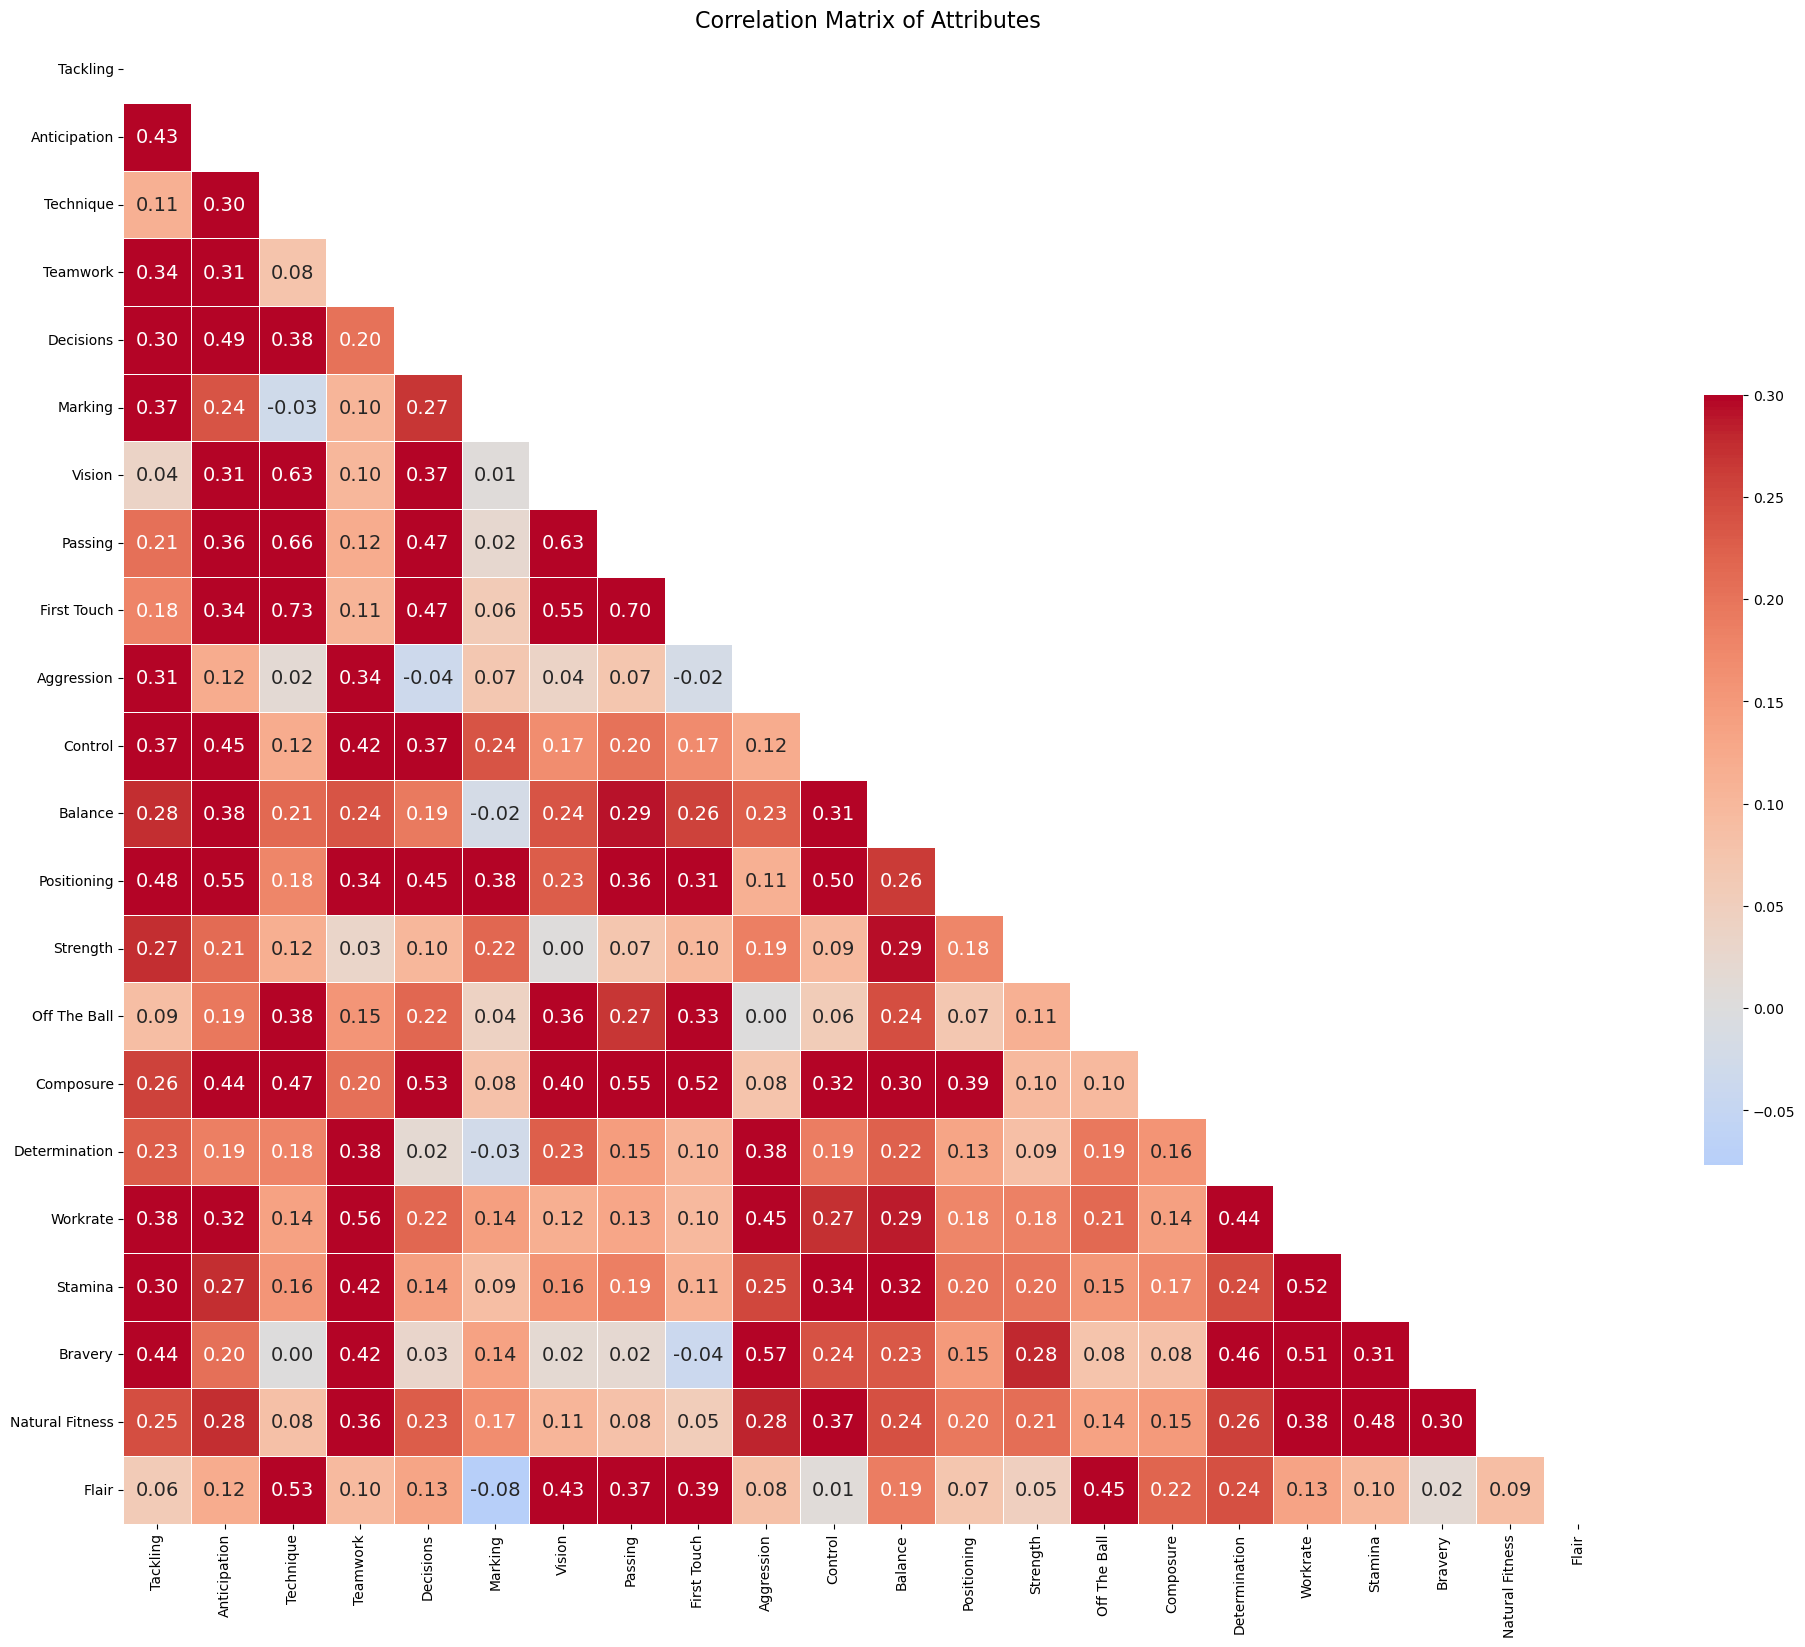

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the columns of interest
attributes = ['Tackling', 'Anticipation', 'Technique', 
              'Teamwork', 'Decisions', 'Marking', 'Vision', 'Passing', 
              'First Touch', 'Aggression', 'Control', 'Balance', 'Positioning', 
              'Strength', 'Off The Ball' , 'Composure', 'Determination',
             'Workrate','Stamina','Bravery','Natural Fitness','Flair']

# Compute the correlation matrix
correlation_matrix = dm_df[attributes].corr()

# Set up the matplotlib figure
plt.figure(figsize=(24, 20))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom sequential colormap with varying shades of blue
cmap = plt.cm.get_cmap('coolwarm')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"fontsize":14})

plt.title('Correlation Matrix of Attributes', fontsize=16)  # Increase title font size
plt.show()


In [58]:
# Selecting the desired columns from the original DataFrame
selected_columns = ['UID', 'Name', 'Club', 'Age' ,'Position', 'Transfer Value ', 'Salary', 'Age', 
                    'dm_key', 'dm_important', 'dm_other', 'dm_score']

# Creating a new DataFrame with the selected columns from ball_playing_defender_df
new_dm_df = dm_df[selected_columns]

# Displaying the new DataFrame
new_dm_df.head(41)

,UID,Name,Club,Age,Position,Transfer Value,Salary,Age,dm_key,dm_important,dm_other,dm_score
0,49056243,Eduardo Camavinga - French,R. Madrid - Spanish First Division,21,"D (L), DM, M (C)","£ 211,000,000.00",250000,21,700,492,237,15.5
1,78084541,Manuel Ugarte - Uruguayan,Paris SG - Ligue 1 Uber Eats,23,"DM, M (C)","£ 207,000,000.00",78000,23,645,496,246,15.1
2,43298481,Sandro Tonali - Italian,Newcastle - English Premier Division,24,"DM, M (C)","£ 174,000,000.00",135000,24,660,472,219,14.7
3,86078360,Moisés Caicedo - Ecuadorian,Chelsea - English Premier Division,22,"DM, M (C)","£ 174,500,000.00",140000,22,685,448,240,14.9
4,19297055,Bruno Guimarães - Brazilian,Newcastle - English Premier Division,26,"DM, M (C)","£ 154,000,000.00",180000,26,720,484,219,15.5
5,91104807,Leon Goretzka - German,FC Bayern - Bundesliga,29,"DM, M/AM (C)","£ 134,000,000.00",230000,29,660,488,222,14.9
6,55070285,João Palhinha - Portuguese,Fulham - English Premier Division,28,"DM, M (C)","£ 105,500,000.00",100000,28,660,480,204,14.6
7,48030711,André-Franck Zambo Anguissa - Cameroonian,Parthenope - Italian Serie A,28,"DM, M (C)","£ 103,500,000.00",99000,28,670,496,225,15.1
8,43167354,Manuel Locatelli - Italian,Juventus - Italian Serie A,26,"DM, M (C)","£ 104,000,000.00",92000,26,655,460,219,14.5
9,67211760,Mikel Merino - Spanish,Real San Sebastián - Spanish First Division,27,"DM, M (C)","£ 76,000,000.00",67000,27,650,464,228,14.6


In [69]:
import pandas as pd

# Creating a new DataFrame with the selected columns from dlp_df
new_dm_df = dm_df[selected_columns]

# Sort the DataFrame based on 'dlp_score' in descending order
new_dm_df = new_dm_df.sort_values(by='dm_score', ascending=False)

# Create an empty string to store the HTML content
html_content = "<h1>DM Attritube Analysis</h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>Dm Score</th></tr>"

# Iterate over each row in the DataFrame
for index, player in new_dm_df.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['Transfer Value ']}</td><td>{player['Salary']}</td><td>{player['dm_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("DM Attribute Analysis report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.


In [70]:
import pandas as pd

# Assuming you already have the DataFrame 'dlp_df' containing the data

# Group the DataFrame by 'Age' and find the player with the highest 'dlp_score' in each age group
best_dm_by_age = dm_df.groupby('Age').apply(lambda x: x.loc[x['dm_score'].idxmax()])

# Select the desired columns for the report
report_columns = ['Name', 'Club', 'Age', 'Position', 'Transfer Value', 'Salary', 'dm_score']

# Create an HTML report
html_content = "<h1>Best DM by Age </h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>DM Score</th></tr>"

# Iterate over each row in the grouped DataFrame
for index, player in best_dm_by_age.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['Transfer Value ']}</td><td>{player['Salary']}</td><td>{player['dm_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("best_dm_by_age_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.
